In [1]:
import numpy as np
from random import randint as ri, random as rf
import matplotlib.pyplot as plt
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
import os

from keras.models import Sequential, load_model, Model
from keras.layers import Dense, concatenate, Input
from keras.optimizers import Adam

plt.style.use('seaborn-deep')

Using TensorFlow backend.


In [2]:
np.random.seed(12)

In [3]:
rcParams['figure.figsize'] = 16, 9
rcParams['legend.fontsize'] = 12

In [4]:
def airplane(last_points):
    x, y = ri(-1,1)*rf(), ri(-1,1)*rf()
    return last_points+np.array([x, y, x**2+1])

In [5]:
start = np.array([ri(-5,5)*rf(),ri(-5,5)*rf(), 0])
motion = [start]
for i in range(50):
    motion.append(airplane(motion[-1]))
motion = np.array(motion)

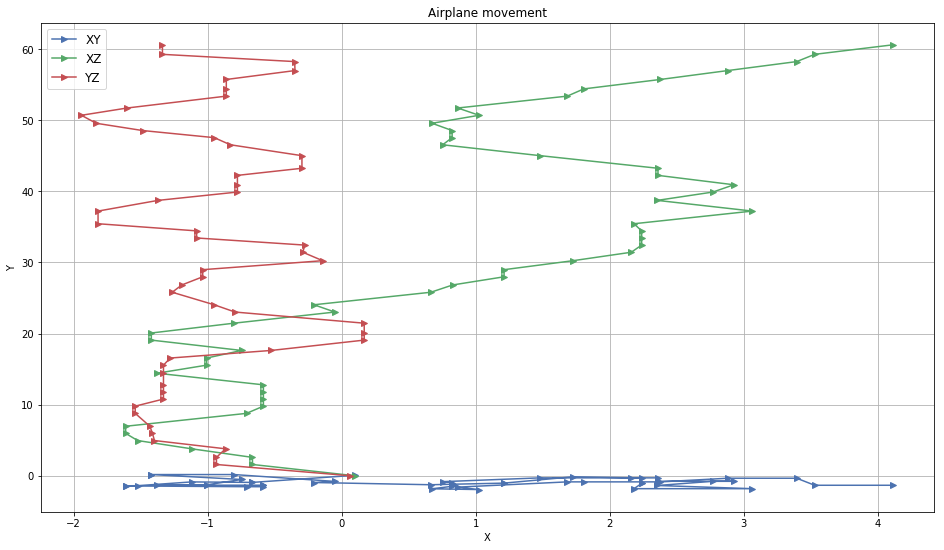

In [6]:
plt.plot(motion[:,0], motion[:,1], linestyle='-', marker='>', label='XY')
plt.plot(motion[:,0], motion[:,2], linestyle='-', marker='>', label='XZ')
plt.plot(motion[:,1], motion[:,2], linestyle='-', marker='>', label='YZ')
plt.title('Airplane movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

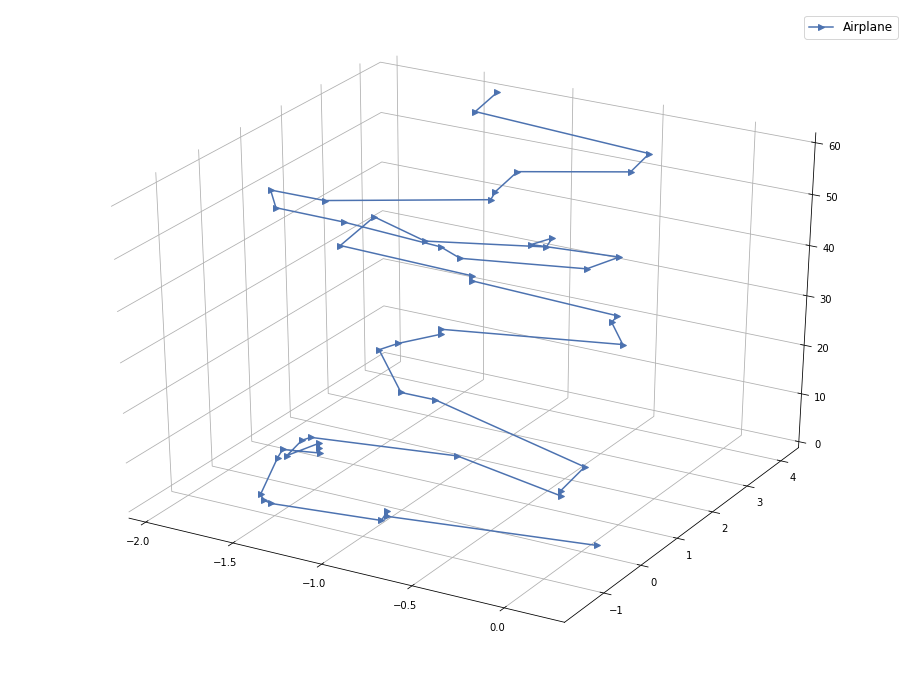

In [7]:
rcParams['figure.figsize'] = 16, 12

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(motion[:,1], motion[:,0], motion[:,2], marker='>', label='Airplane')

ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.5))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.5))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.5))

ax.legend()

plt.show()

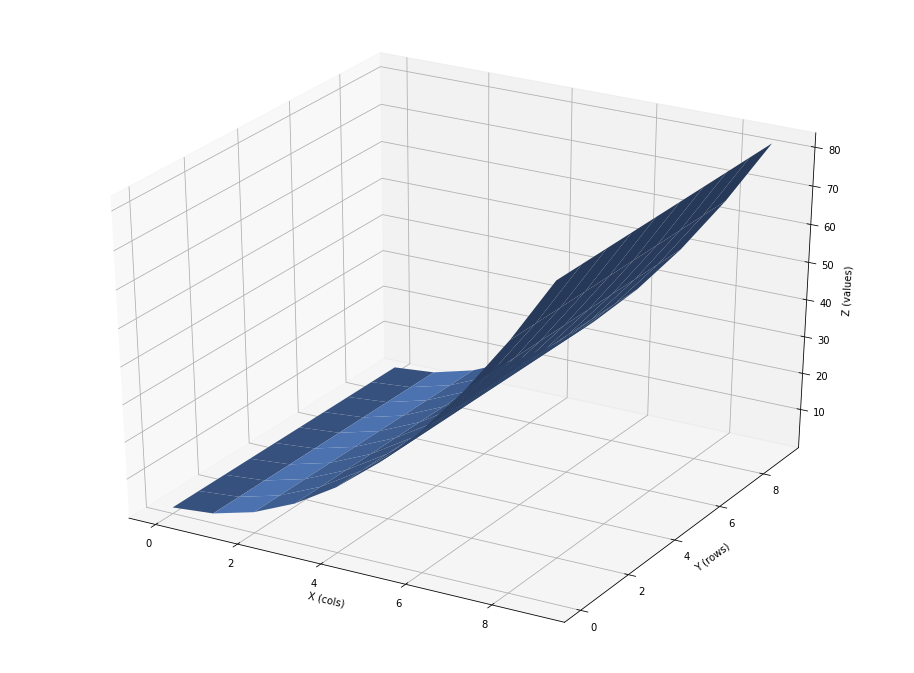

In [9]:
(x, y) = np.meshgrid(np.arange(10), np.arange(10))

rcParams['figure.figsize'] = 16, 12

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, x**2+1, label='Z')

ax.set_xlabel('X (cols)')
ax.set_ylabel('Y (rows)')
ax.set_zlabel('Z (values)')

plt.show()

In [10]:
def airplane(last_points=np.array([ri(-100,100)*rf(), ri(-100,100)*rf(), 0])):
        x, y = ri(1,2)*rf(), ri(-1,1)*rf()
        return np.hstack((last_points[:2], [x, y])), [np.hstack((last_points[:2]+np.array([x, y]), [x**2+1]))]

In [11]:
X, Y = airplane()
for i in range(10):
    x, y = airplane(Y[-1])
    Y = np.vstack((Y,y))
    X = np.vstack((X,x))

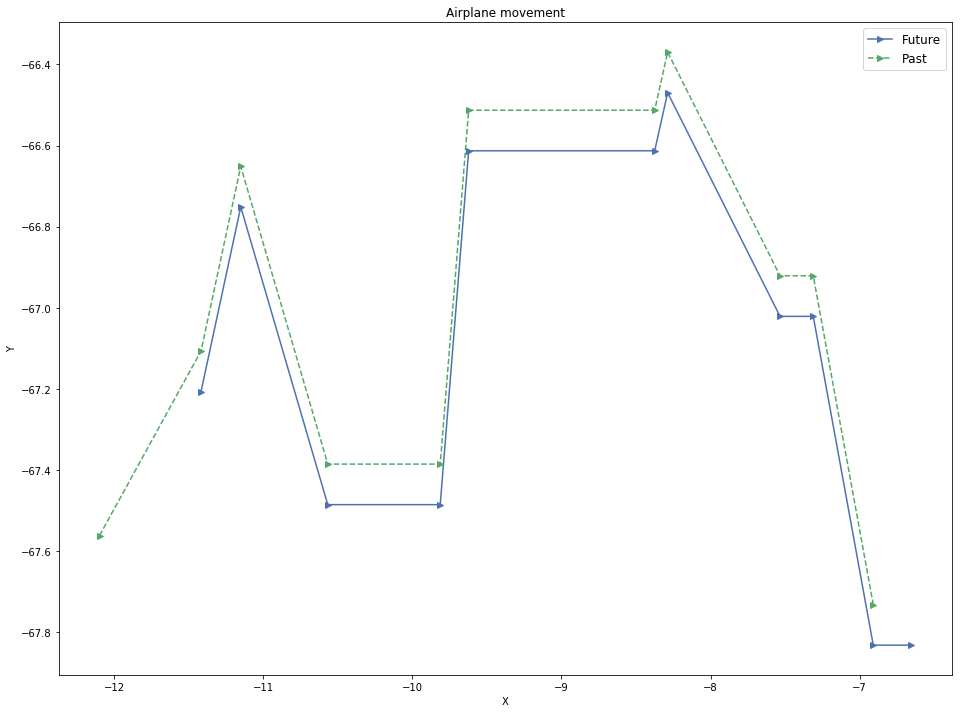

In [13]:
plt.plot(Y[:,0], Y[:,1], marker='>', label='Future')
plt.plot(X[:,0], X[:,1]+0.1, linestyle='--', marker='>', label='Past')
plt.title('Airplane movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [14]:
X, Y = airplane(np.array([ri(-100,100)*rf(), ri(-100,100)*rf(), 0]))
for i in range(20):
    x, y = airplane(Y[-1])
    Y = np.vstack((Y,y))
    X = np.vstack((X,x))
    
for i in range(100):
    x, y = airplane(np.array([ri(-100,100)*rf(), ri(-100,100)*rf(), 0]))
    Y = np.vstack((Y,y))
    X = np.vstack((X,x))
    
    for i in range(20):
        x, y = airplane(Y[-1])
        Y = np.vstack((Y,y))
        X = np.vstack((X,x))

In [15]:
X_test, Y_test = airplane(np.array([ri(-100,100)*rf(), ri(-100,100)*rf(), 0]))
for i in range(20):
    x, y = airplane(Y_test[-1])
    Y_test = np.vstack((Y_test,y))
    X_test = np.vstack((X_test,x))
    
for i in range(20):
    x, y = airplane(np.array([ri(-100,100)*rf(), ri(-100,100)*rf(), 0]))
    Y_test = np.vstack((Y_test,y))
    X_test = np.vstack((X_test,x))
    
    for i in range(20):
        x, y = airplane(Y_test[-1])
        Y_test = np.vstack((Y_test,y))
        X_test = np.vstack((X_test,x))

In [16]:
X.shape, Y.shape, X_test.shape, Y_test.shape

((2121, 4), (2121, 3), (441, 4), (441, 3))

In [79]:
np.max(X[:,2]), np.min(X[:,2]), np.max(Y[:,2])

(1.9976261717040307, 0.0018590279891068651, 4.9905103218769016)

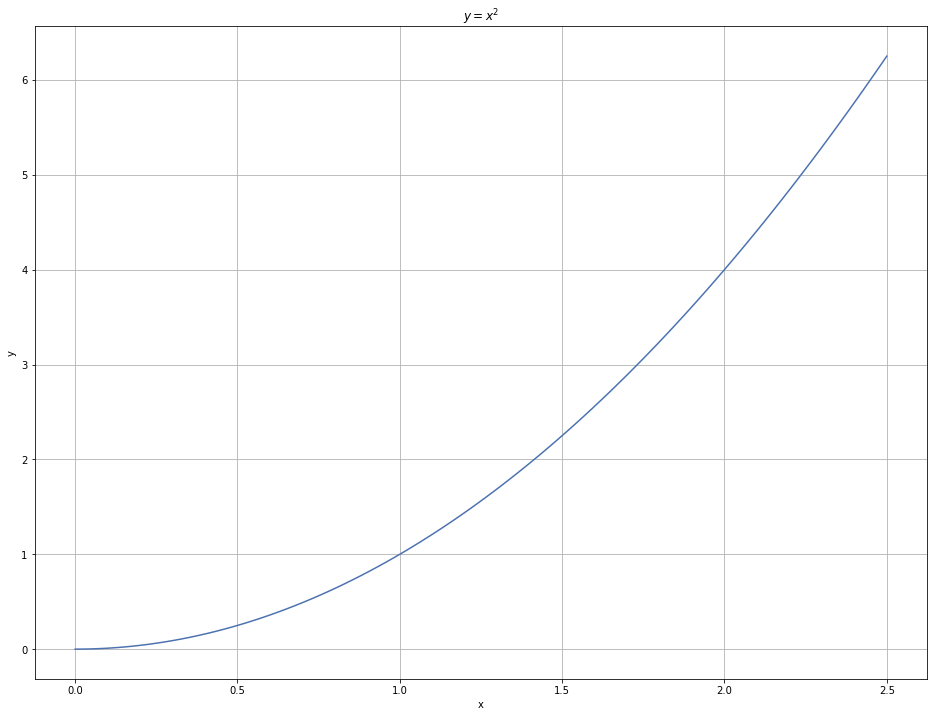

In [18]:
values = np.linspace(0,2.5,100)
sqr = values**2

plt.plot(values,sqr)
plt.title(r'$y=x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [28]:
In1 = Input(shape=(1,), name='Sigmoid_input')
L1 = Dense(1, activation='sigmoid', kernel_initializer='he_uniform', name='Sigmoid')(In1)

In2 = Input(shape=(4,), name='Main_input')

merge = concatenate([L1, In2])
out = Dense(3, kernel_initializer='normal', name='Output')(merge)

model = Model(inputs=[In1, In2], outputs=[out])

opt = Adam(lr=0.0004)

model.compile(optimizer=opt, loss='mae')

In [30]:
model.get_weights()

[array([[ 0.64031172]], dtype=float32),
 array([ 0.], dtype=float32),
 array([[-0.04531071, -0.06072725,  0.03501315],
        [ 0.15027396, -0.03551872, -0.01611017],
        [ 0.00560233, -0.01358776, -0.02555066],
        [ 0.02712761, -0.09447053, -0.0651358 ],
        [ 0.01993074, -0.03376244,  0.05232152]], dtype=float32),
 array([ 0.,  0.,  0.], dtype=float32)]

In [31]:
Hist = model.fit([X[:,2],X], Y, batch_size=40, epochs=1000, validation_data=([X_test[:,2], X_test],Y_test))

Train on 2121 samples, validate on 441 samples
Epoch 1/1000
2121/2121 [==============================] - 1s - loss: 16.2194 - val_loss: 16.9611
Epoch 2/1000
2121/2121 [==============================] - 1s - loss: 15.7893 - val_loss: 16.5124
Epoch 3/1000
2121/2121 [==============================] - 1s - loss: 15.3756 - val_loss: 16.0773
Epoch 4/1000
2121/2121 [==============================] - 1s - loss: 14.9770 - val_loss: 15.6650
Epoch 5/1000
2121/2121 [==============================] - 1s - loss: 14.5837 - val_loss: 15.2822
Epoch 6/1000
2121/2121 [==============================] - 1s - loss: 14.1963 - val_loss: 14.8838
Epoch 7/1000
2121/2121 [==============================] - 0s - loss: 13.8071 - val_loss: 14.4826
Epoch 8/1000
2121/2121 [==============================] - 1s - loss: 13.4234 - val_loss: 14.0932
Epoch 9/1000
2121/2121 [==============================] - 1s - loss: 13.0402 - val_loss: 13.6958
Epoch 10/1000
2121/2121 [==============================] - 1s - loss: 12.6581 - 

2121/2121 [==============================] - 0s - loss: 0.0906 - val_loss: 0.0873
Epoch 86/1000
2121/2121 [==============================] - 0s - loss: 0.0915 - val_loss: 0.0868
Epoch 87/1000
2121/2121 [==============================] - 0s - loss: 0.0902 - val_loss: 0.0868
Epoch 88/1000
2121/2121 [==============================] - 0s - loss: 0.0897 - val_loss: 0.0872
Epoch 89/1000
2121/2121 [==============================] - 0s - loss: 0.0900 - val_loss: 0.0849
Epoch 90/1000
2121/2121 [==============================] - 0s - loss: 0.0896 - val_loss: 0.0847
Epoch 91/1000
2121/2121 [==============================] - 0s - loss: 0.0884 - val_loss: 0.0837
Epoch 92/1000
2121/2121 [==============================] - 1s - loss: 0.0879 - val_loss: 0.0846
Epoch 93/1000
2121/2121 [==============================] - 1s - loss: 0.0883 - val_loss: 0.0850
Epoch 94/1000
2121/2121 [==============================] - 1s - loss: 0.0879 - val_loss: 0.0851
Epoch 95/1000
2121/2121 [=============================

2121/2121 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0784
Epoch 170/1000
2121/2121 [==============================] - 0s - loss: 0.0791 - val_loss: 0.0796
Epoch 171/1000
2121/2121 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0805
Epoch 172/1000
2121/2121 [==============================] - 0s - loss: 0.0801 - val_loss: 0.0787
Epoch 173/1000
2121/2121 [==============================] - 1s - loss: 0.0789 - val_loss: 0.0791
Epoch 174/1000
2121/2121 [==============================] - 0s - loss: 0.0788 - val_loss: 0.0787
Epoch 175/1000
2121/2121 [==============================] - 1s - loss: 0.0791 - val_loss: 0.0791
Epoch 176/1000
2121/2121 [==============================] - 0s - loss: 0.0799 - val_loss: 0.0782
Epoch 177/1000
2121/2121 [==============================] - 0s - loss: 0.0789 - val_loss: 0.0793
Epoch 178/1000
2121/2121 [==============================] - 0s - loss: 0.0791 - val_loss: 0.0797
Epoch 179/1000
2121/2121 [===================

2121/2121 [==============================] - 0s - loss: 0.0788 - val_loss: 0.0787
Epoch 254/1000
2121/2121 [==============================] - 0s - loss: 0.0786 - val_loss: 0.0779
Epoch 255/1000
2121/2121 [==============================] - 0s - loss: 0.0786 - val_loss: 0.0793
Epoch 256/1000
2121/2121 [==============================] - 0s - loss: 0.0785 - val_loss: 0.0790
Epoch 257/1000
2121/2121 [==============================] - 1s - loss: 0.0785 - val_loss: 0.0791
Epoch 258/1000
2121/2121 [==============================] - 0s - loss: 0.0787 - val_loss: 0.0797
Epoch 259/1000
2121/2121 [==============================] - 1s - loss: 0.0796 - val_loss: 0.0791
Epoch 260/1000
2121/2121 [==============================] - 0s - loss: 0.0798 - val_loss: 0.0783
Epoch 261/1000
2121/2121 [==============================] - 1s - loss: 0.0785 - val_loss: 0.0790
Epoch 262/1000
2121/2121 [==============================] - 0s - loss: 0.0787 - val_loss: 0.0791
Epoch 263/1000
2121/2121 [===================

2121/2121 [==============================] - 1s - loss: 0.0781 - val_loss: 0.0786
Epoch 338/1000
2121/2121 [==============================] - 1s - loss: 0.0782 - val_loss: 0.0789
Epoch 339/1000
2121/2121 [==============================] - 0s - loss: 0.0787 - val_loss: 0.0798
Epoch 340/1000
2121/2121 [==============================] - 0s - loss: 0.0782 - val_loss: 0.0788
Epoch 341/1000
2121/2121 [==============================] - 0s - loss: 0.0782 - val_loss: 0.0798
Epoch 342/1000
2121/2121 [==============================] - 0s - loss: 0.0792 - val_loss: 0.0786
Epoch 343/1000
2121/2121 [==============================] - 1s - loss: 0.0779 - val_loss: 0.0787
Epoch 344/1000
2121/2121 [==============================] - 0s - loss: 0.0784 - val_loss: 0.0782
Epoch 345/1000
2121/2121 [==============================] - 1s - loss: 0.0786 - val_loss: 0.0785
Epoch 346/1000
2121/2121 [==============================] - 0s - loss: 0.0780 - val_loss: 0.0790
Epoch 347/1000
2121/2121 [===================

2121/2121 [==============================] - 0s - loss: 0.0781 - val_loss: 0.0796
Epoch 422/1000
2121/2121 [==============================] - 0s - loss: 0.0786 - val_loss: 0.0781
Epoch 423/1000
2121/2121 [==============================] - 0s - loss: 0.0776 - val_loss: 0.0785
Epoch 424/1000
2121/2121 [==============================] - 1s - loss: 0.0777 - val_loss: 0.0816
Epoch 425/1000
2121/2121 [==============================] - 1s - loss: 0.0792 - val_loss: 0.0788
Epoch 426/1000
2121/2121 [==============================] - 0s - loss: 0.0781 - val_loss: 0.0780
Epoch 427/1000
2121/2121 [==============================] - 0s - loss: 0.0776 - val_loss: 0.0785
Epoch 428/1000
2121/2121 [==============================] - 1s - loss: 0.0779 - val_loss: 0.0779
Epoch 429/1000
2121/2121 [==============================] - 0s - loss: 0.0776 - val_loss: 0.0799
Epoch 430/1000
2121/2121 [==============================] - 0s - loss: 0.0784 - val_loss: 0.0786
Epoch 431/1000
2121/2121 [===================

2121/2121 [==============================] - 0s - loss: 0.0765 - val_loss: 0.0780
Epoch 506/1000
2121/2121 [==============================] - 1s - loss: 0.0771 - val_loss: 0.0794
Epoch 507/1000
2121/2121 [==============================] - 0s - loss: 0.0783 - val_loss: 0.0775
Epoch 508/1000
2121/2121 [==============================] - 1s - loss: 0.0766 - val_loss: 0.0770
Epoch 509/1000
2121/2121 [==============================] - 0s - loss: 0.0768 - val_loss: 0.0764
Epoch 510/1000
2121/2121 [==============================] - 0s - loss: 0.0767 - val_loss: 0.0756
Epoch 511/1000
2121/2121 [==============================] - 1s - loss: 0.0769 - val_loss: 0.0761
Epoch 512/1000
2121/2121 [==============================] - 1s - loss: 0.0763 - val_loss: 0.0784
Epoch 513/1000
2121/2121 [==============================] - 0s - loss: 0.0774 - val_loss: 0.0771
Epoch 514/1000
2121/2121 [==============================] - 1s - loss: 0.0773 - val_loss: 0.0777
Epoch 515/1000
2121/2121 [===================

2121/2121 [==============================] - 0s - loss: 0.0749 - val_loss: 0.0778
Epoch 590/1000
2121/2121 [==============================] - 0s - loss: 0.0761 - val_loss: 0.0749
Epoch 591/1000
2121/2121 [==============================] - 1s - loss: 0.0744 - val_loss: 0.0760
Epoch 592/1000
2121/2121 [==============================] - 0s - loss: 0.0747 - val_loss: 0.0749
Epoch 593/1000
2121/2121 [==============================] - 1s - loss: 0.0746 - val_loss: 0.0747
Epoch 594/1000
2121/2121 [==============================] - 0s - loss: 0.0745 - val_loss: 0.0754
Epoch 595/1000
2121/2121 [==============================] - 0s - loss: 0.0749 - val_loss: 0.0757
Epoch 596/1000
2121/2121 [==============================] - 1s - loss: 0.0751 - val_loss: 0.0752
Epoch 597/1000
2121/2121 [==============================] - 1s - loss: 0.0749 - val_loss: 0.0761
Epoch 598/1000
2121/2121 [==============================] - 0s - loss: 0.0746 - val_loss: 0.0763
Epoch 599/1000
2121/2121 [===================

2121/2121 [==============================] - 0s - loss: 0.0703 - val_loss: 0.0711
Epoch 674/1000
2121/2121 [==============================] - 0s - loss: 0.0695 - val_loss: 0.0703
Epoch 675/1000
2121/2121 [==============================] - 0s - loss: 0.0697 - val_loss: 0.0708
Epoch 676/1000
2121/2121 [==============================] - 0s - loss: 0.0703 - val_loss: 0.0692
Epoch 677/1000
2121/2121 [==============================] - 1s - loss: 0.0693 - val_loss: 0.0690
Epoch 678/1000
2121/2121 [==============================] - 1s - loss: 0.0693 - val_loss: 0.0701
Epoch 679/1000
2121/2121 [==============================] - 1s - loss: 0.0693 - val_loss: 0.0702
Epoch 680/1000
2121/2121 [==============================] - 1s - loss: 0.0696 - val_loss: 0.0704
Epoch 681/1000
2121/2121 [==============================] - 1s - loss: 0.0693 - val_loss: 0.0693
Epoch 682/1000
2121/2121 [==============================] - 0s - loss: 0.0690 - val_loss: 0.0686
Epoch 683/1000
2121/2121 [===================

2121/2121 [==============================] - 1s - loss: 0.0588 - val_loss: 0.0624
Epoch 758/1000
2121/2121 [==============================] - 0s - loss: 0.0609 - val_loss: 0.0599
Epoch 759/1000
2121/2121 [==============================] - 1s - loss: 0.0590 - val_loss: 0.0593
Epoch 760/1000
2121/2121 [==============================] - 0s - loss: 0.0589 - val_loss: 0.0581
Epoch 761/1000
2121/2121 [==============================] - 0s - loss: 0.0584 - val_loss: 0.0586
Epoch 762/1000
2121/2121 [==============================] - 1s - loss: 0.0584 - val_loss: 0.0618
Epoch 763/1000
2121/2121 [==============================] - 0s - loss: 0.0601 - val_loss: 0.0601
Epoch 764/1000
2121/2121 [==============================] - 1s - loss: 0.0582 - val_loss: 0.0591
Epoch 765/1000
2121/2121 [==============================] - 1s - loss: 0.0579 - val_loss: 0.0583
Epoch 766/1000
2121/2121 [==============================] - 1s - loss: 0.0573 - val_loss: 0.0587
Epoch 767/1000
2121/2121 [===================

2121/2121 [==============================] - 0s - loss: 0.0390 - val_loss: 0.0404
Epoch 842/1000
2121/2121 [==============================] - 0s - loss: 0.0394 - val_loss: 0.0398
Epoch 843/1000
2121/2121 [==============================] - 1s - loss: 0.0390 - val_loss: 0.0390
Epoch 844/1000
2121/2121 [==============================] - 0s - loss: 0.0383 - val_loss: 0.0387
Epoch 845/1000
2121/2121 [==============================] - 1s - loss: 0.0380 - val_loss: 0.0403
Epoch 846/1000
2121/2121 [==============================] - 1s - loss: 0.0391 - val_loss: 0.0389
Epoch 847/1000
2121/2121 [==============================] - 0s - loss: 0.0375 - val_loss: 0.0376
Epoch 848/1000
2121/2121 [==============================] - 0s - loss: 0.0368 - val_loss: 0.0366
Epoch 849/1000
2121/2121 [==============================] - 1s - loss: 0.0365 - val_loss: 0.0384
Epoch 850/1000
2121/2121 [==============================] - 1s - loss: 0.0374 - val_loss: 0.0373
Epoch 851/1000
2121/2121 [===================

2121/2121 [==============================] - 1s - loss: 0.0143 - val_loss: 0.0144
Epoch 926/1000
2121/2121 [==============================] - 0s - loss: 0.0133 - val_loss: 0.0128
Epoch 927/1000
2121/2121 [==============================] - 1s - loss: 0.0133 - val_loss: 0.0123
Epoch 928/1000
2121/2121 [==============================] - 1s - loss: 0.0128 - val_loss: 0.0137
Epoch 929/1000
2121/2121 [==============================] - 1s - loss: 0.0127 - val_loss: 0.0119
Epoch 930/1000
2121/2121 [==============================] - 1s - loss: 0.0127 - val_loss: 0.0140
Epoch 931/1000
2121/2121 [==============================] - 1s - loss: 0.0133 - val_loss: 0.0139
Epoch 932/1000
2121/2121 [==============================] - 0s - loss: 0.0130 - val_loss: 0.0148
Epoch 933/1000
2121/2121 [==============================] - 1s - loss: 0.0136 - val_loss: 0.0139
Epoch 934/1000
2121/2121 [==============================] - 0s - loss: 0.0135 - val_loss: 0.0122
Epoch 935/1000
2121/2121 [===================

In [81]:
model.save('nonlinear.h5')

In [83]:
opt = Adam(lr=0.0001)

model.compile(optimizer=opt, loss='mse')

Hist = model.fit([X[:,2],X], Y, batch_size=40, epochs=100, validation_data=([X_test[:,2], X_test],Y_test))

Train on 2121 samples, validate on 441 samples
Epoch 1/100
2121/2121 [==============================] - 1s - loss: 3.5416e-04 - val_loss: 3.0295e-04
Epoch 2/100
2121/2121 [==============================] - 0s - loss: 3.5757e-04 - val_loss: 2.9824e-04
Epoch 3/100
2121/2121 [==============================] - 1s - loss: 3.4397e-04 - val_loss: 2.9925e-04
Epoch 4/100
2121/2121 [==============================] - 1s - loss: 3.4430e-04 - val_loss: 2.9729e-04
Epoch 5/100
2121/2121 [==============================] - 1s - loss: 3.3895e-04 - val_loss: 3.0825e-04
Epoch 6/100
2121/2121 [==============================] - 1s - loss: 3.4056e-04 - val_loss: 3.1084e-04
Epoch 7/100
2121/2121 [==============================] - 1s - loss: 3.4009e-04 - val_loss: 2.9590e-04
Epoch 8/100
2121/2121 [==============================] - 1s - loss: 3.4362e-04 - val_loss: 3.0031e-04
Epoch 9/100
2121/2121 [==============================] - 1s - loss: 3.3746e-04 - val_loss: 2.9219e-04
Epoch 10/100
2121/2121 [===========

2121/2121 [==============================] - 1s - loss: 3.1555e-04 - val_loss: 2.7102e-04
Epoch 81/100
2121/2121 [==============================] - 1s - loss: 3.0786e-04 - val_loss: 2.8546e-04
Epoch 82/100
2121/2121 [==============================] - 1s - loss: 3.1756e-04 - val_loss: 2.7161e-04
Epoch 83/100
2121/2121 [==============================] - 1s - loss: 3.1862e-04 - val_loss: 2.8415e-04
Epoch 84/100
2121/2121 [==============================] - 1s - loss: 3.1655e-04 - val_loss: 2.7559e-04
Epoch 85/100
2121/2121 [==============================] - 1s - loss: 3.0805e-04 - val_loss: 2.7691e-04
Epoch 86/100
2121/2121 [==============================] - 1s - loss: 3.0678e-04 - val_loss: 2.7500e-04
Epoch 87/100
2121/2121 [==============================] - 1s - loss: 3.0946e-04 - val_loss: 2.7154e-04
Epoch 88/100
2121/2121 [==============================] - 1s - loss: 3.0680e-04 - val_loss: 2.9536e-04
Epoch 89/100
2121/2121 [==============================] - 1s - loss: 3.2437e-04 - val_

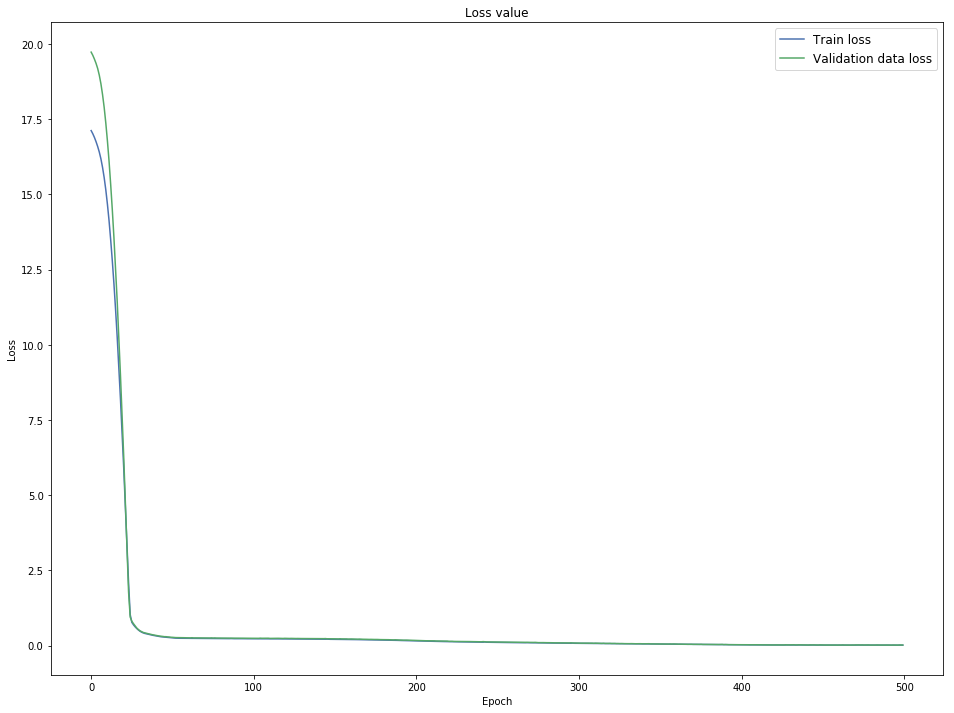

In [153]:
plt.plot(list(range(500)), Hist.history['loss'], label='Train loss')
plt.plot(list(range(500)), Hist.history['val_loss'], label='Validation data loss')
plt.title('Loss value')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [84]:
Xn_test, Yn_test = airplane(np.array([ri(-100,100)*rf(), ri(-100,100)*rf(), 0]))
for i in range(20):
    x, y = airplane(Yn_test[-1])
    Yn_test = np.vstack((Yn_test,y))
    Xn_test = np.vstack((Xn_test,x))

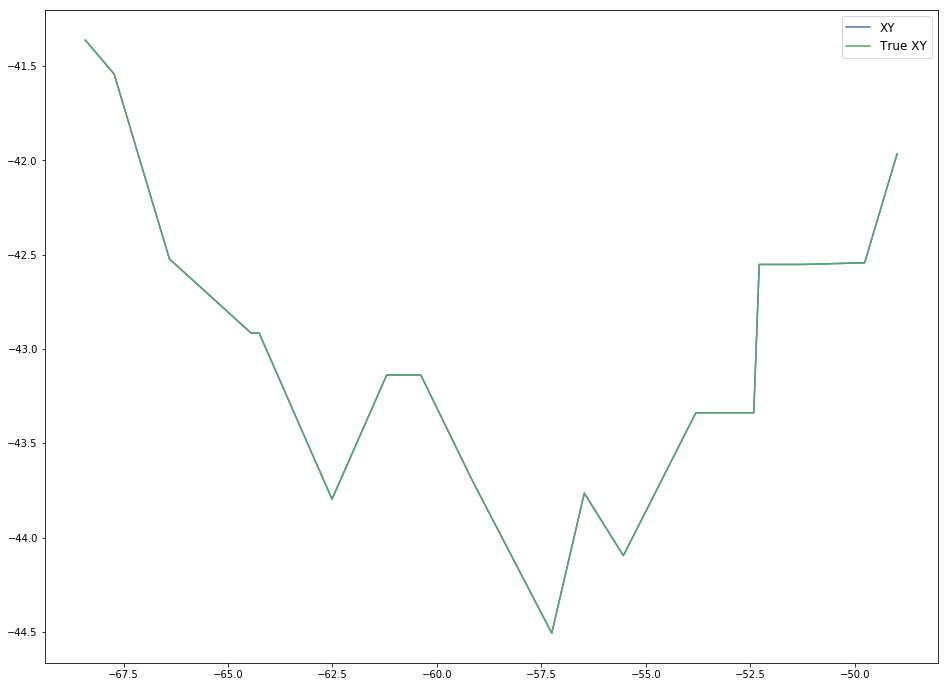

In [85]:
predicted = model.predict([Xn_test[:,2],Xn_test])

plt.plot(predicted[:,0], predicted[:,1], label='XY')
plt.plot(Yn_test[:,0], Yn_test[:,1], label='True XY')
plt.legend()
plt.show()

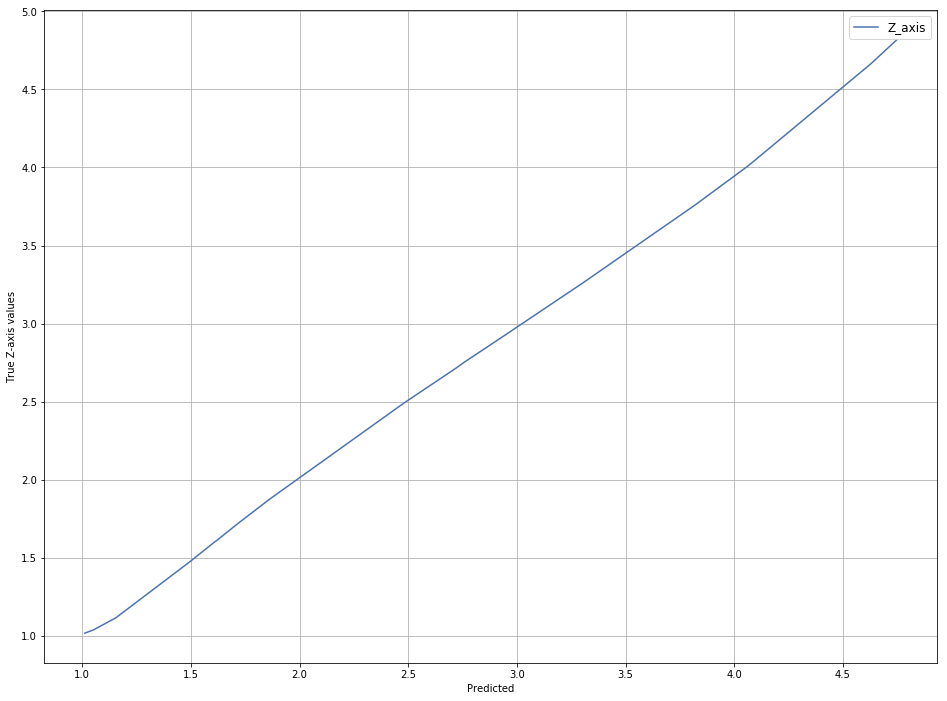

In [86]:
args = Yn_test[:,2].argsort()
plt.plot(predicted[:,2][args[::-1]], Yn_test[:,2][args[::-1]], label='Z_axis')
plt.xlabel('Predicted')
plt.ylabel('True Z-axis values')
plt.grid()
plt.legend()
plt.show()

In [87]:
predicted[:,2], Yn_test[:,2]

(array([ 3.82128048,  1.49467421,  2.75419426,  4.74631119,  1.05098903,
         4.09342384,  2.72043991,  1.15376127,  1.01313901,  1.15563893,
         2.48064399,  4.62964058,  1.61509943,  1.86060214,  4.06340885,
         2.94290829,  1.01165152,  1.71111321,  1.03804314,  3.29924965,
         1.61006987], dtype=float32),
 array([ 3.76107054,  1.47410807,  2.74930664,  4.81583736,  1.03751741,
         4.04425136,  2.71522912,  1.11484519,  1.01812649,  1.11653426,
         2.49154804,  4.66539242,  1.6065525 ,  1.87383746,  4.00985166,
         2.92397928,  1.01716303,  1.71382205,  1.03073135,  3.25658419,
         1.60224012]))

In [88]:
for w in model.get_weights():
    print(np.round(w))

[[ 3.]]
[-4.]
[[-0.  0.  5.]
 [ 1.  0. -0.]
 [-0.  1. -0.]
 [ 1.  0.  0.]
 [-0.  1.  0.]]
[ 0.  0.  1.]


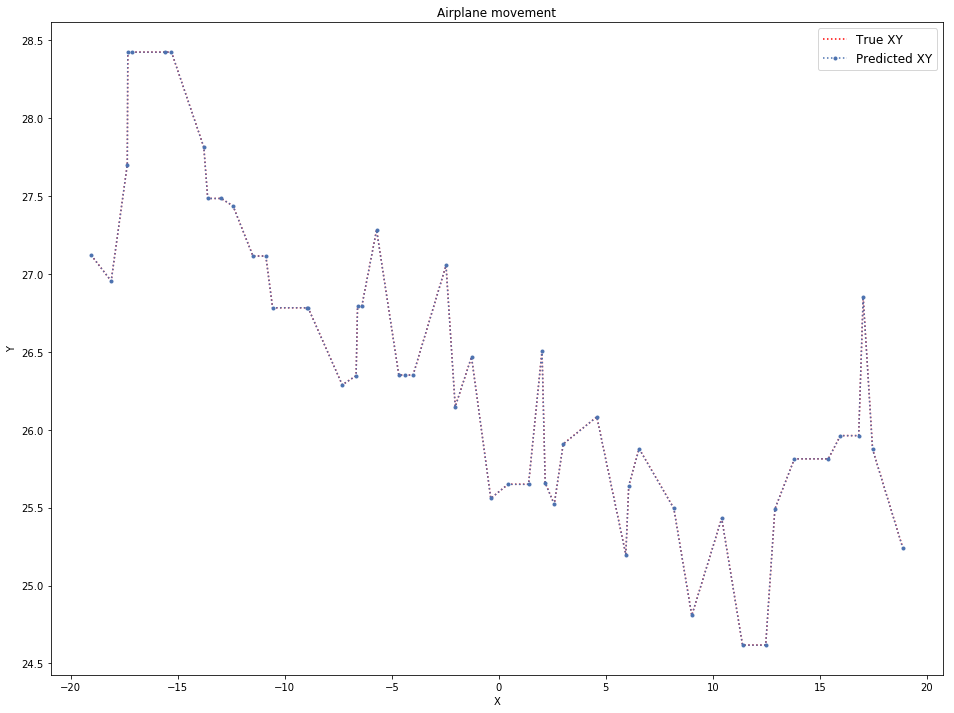

In [97]:
X_super_test, Y_super_test = airplane(np.array([ri(-100,100)*rf(), ri(-100,100)*rf(), 0]))
for i in range(50):
    x, y = airplane(Y_super_test[-1])
    Y_super_test = np.vstack((Y_super_test,y))
    X_super_test = np.vstack((X_super_test,x))
    
now = model.predict([X_super_test[:,2][:1],X_super_test[:1]])
predicted = np.array(now)

for i in range(1, X_super_test.shape[0]):
    now = np.hstack((now[:,:2],X_super_test[i:i+1,2:]))
    now = model.predict([now[:,2],now])
    predicted = np.vstack((predicted,now))
    
plt.plot(Y_super_test[:,0], Y_super_test[:,1], linestyle=':', label='True XY', color='r')
plt.plot(predicted[:,0], predicted[:,1], linestyle=':', marker='.', label='Predicted XY')
plt.title('Airplane movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

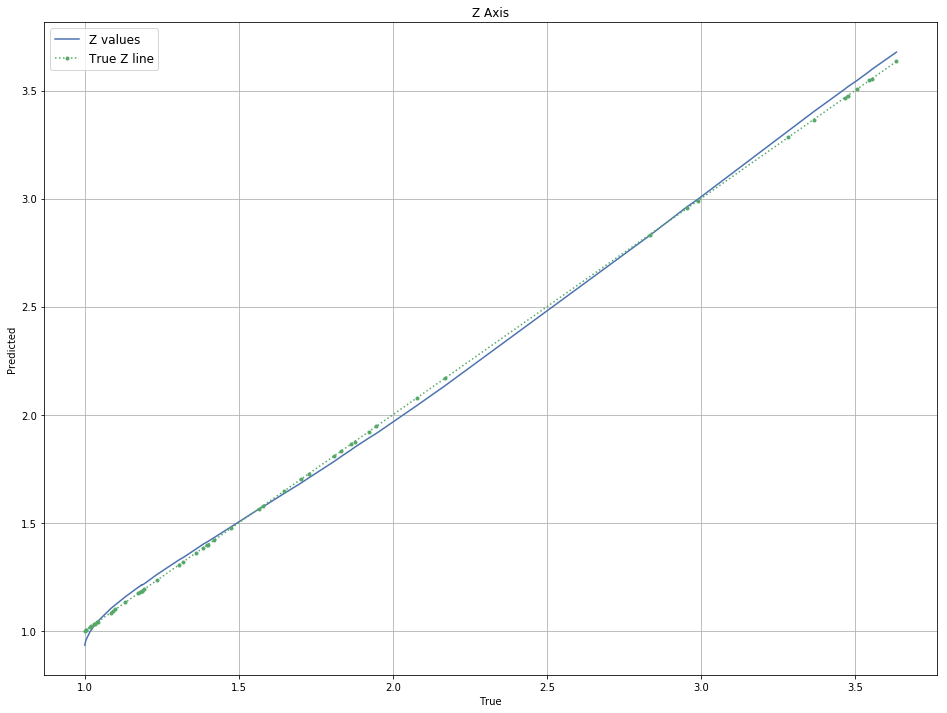

In [102]:
Sorted_indexes = Y_super_test[:,2].argsort()
plt.plot(Y_super_test[:,2][Sorted_indexes], 
         predicted[:,2][Sorted_indexes], 
         linestyle='-', 
#          marker='.', 
         label='Z values')

plt.plot(Y_super_test[:,2][Sorted_indexes], 
         Y_super_test[:,2][Sorted_indexes], 
         linestyle=':', 
         marker='.', 
         label='True Z line')

plt.title('Z Axis')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()